In [20]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
path = r'/Users/polinarozhkova/Desktop/GitHub/cr_eda_chicago/'
final_merge_df = pd.read_csv(os.path.join(path, 'clean_data/merge_all.csv'))
cr_reports = pd.read_excel(os.path.join(path, 'inputs/CR_from_CPD_Annual_Reports_copy.xlsx'))

### Plot 1

In [22]:
yr_month_map = pd.DataFrame(final_merge_df.groupby(['year', 'month'])
                            ['case_number'].count()).reset_index()
yr_month_map = yr_month_map.rename(
    columns={'case_number': 'homicides'}).pivot('year', 'month', 'homicides')

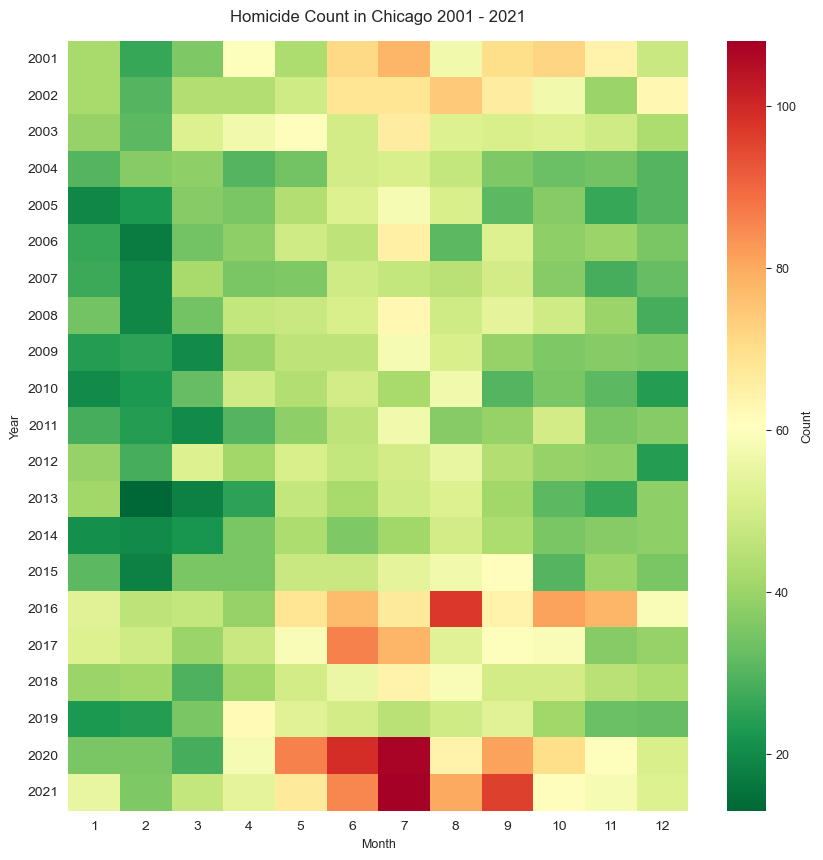

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(yr_month_map, cmap='RdYlGn_r',
            cbar_kws={'label': 'Count'})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
plt.title('Homicide Count in Chicago 2001 - 2021', fontdict={'fontsize': 12}, pad=14)
plt.savefig(os.path.join(path, 'plots/static_plot_1.png'))

In [39]:
all_cleared_df = final_merge_df[final_merge_df['cleared'] == 'Y']
all_cleared_df.head(10)

,case_number,unique_id,date_x,block_x,primary_type,iucr,age,sex,race,month,...,year,id,date,injury_type,cleared,date_clear,beat,district,time_to_clear,year_cleared
0,G011117,HOM-G011117-#1,2001-01-06 03:30:00,8700 S BURLEY AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,644.0,2001-01-06 00:00:00,SHOT,Y,2001-02-27,424.0,4.0,52.0,2001.0
2,G032407,HOM-G032407-#1,2001-01-16 01:17:00,600 N CICERO AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,659.0,2001-01-16 00:00:00,SHOT,Y,2001-05-28,1111.0,11.0,132.0,2001.0
3,G040822,HOM-G040822-#1,2001-01-20 01:09:00,1000 N CICERO AVE,HOMICIDE,110,0-19,M,BLK,1,...,2001,663.0,2001-01-20 00:00:00,SHOT,Y,2001-01-24,1111.0,11.0,4.0,2001.0
4,G042611,HOM-G042611-#1,2001-01-20 23:26:00,700 N DRAKE AVE,HOMICIDE,110,30-39,M,WWH,1,...,2001,664.0,2001-01-20 00:00:00,SHOT,Y,2001-07-05,1121.0,11.0,166.0,2001.0
5,G042730,HOM-G042730-#1,2001-01-21 01:15:00,7800 S CONSTANCE AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,666.0,2001-01-21 00:00:00,SHOT,Y,2001-02-26,414.0,4.0,36.0,2001.0
7,G057222,HOM-G057222-#1,2001-01-28 03:11:00,4200 W LAKE ST,HOMICIDE,110,20-29,M,BLK,1,...,2001,670.0,2001-01-28 00:00:00,SHOT,Y,2001-02-09,1114.0,11.0,12.0,2001.0
8,G057558,HOM-G057558-#1,2001-01-01 02:30:00,7600 S MAY ST,HOMICIDE,110,20-29,M,BLK,1,...,2001,671.0,2001-01-01 00:00:00,STABBED,Y,2001-02-26,612.0,6.0,56.0,2001.0
10,G063251,HOM-G063251-#1,2001-01-31 00:50:00,6400 N CAMPBELL AVE,HOMICIDE,110,50-59,M,API,1,...,2001,679.0,2001-01-31 00:00:00,ASSAULT,Y,2001-03-13,2412.0,24.0,41.0,2001.0
12,G068951,HOM-G068951-#1,2001-02-02 20:54:00,7800 S SANGAMON ST,HOMICIDE,110,20-29,M,BLK,2,...,2001,677.0,2001-02-02 00:00:00,SHOT,Y,2001-03-12,621.0,6.0,38.0,2001.0
13,G069278,HOM-G069278-#1,2001-02-03 00:53:00,1500 W WARREN BV,HOMICIDE,110,30-39,F,BLK,2,...,2001,678.0,2001-02-03 00:00:00,STRANGULATION,Y,2001-05-03,1333.0,13.0,89.0,2001.0


In [25]:
all_cleared_df['time_to_clear'].describe()

count    5410.000000
mean      413.908503
std       928.182992
min       -17.000000
25%         5.000000
50%        56.000000
75%       311.000000
max      7476.000000
Name: time_to_clear, dtype: float64

In [26]:
all_cleared_df['time_to_clear'].sort_values()

9094      -17.0
10726      -1.0
8732       -1.0
8742       -1.0
7908        0.0
          ...  
481      7055.0
171      7095.0
9931     7102.0
663      7358.0
7276     7476.0
Name: time_to_clear, Length: 5410, dtype: float64

Dropping incidents that were cleared immediately and likely administrative error of -17 days: 

In [27]:
all_cleared_df = all_cleared_df[all_cleared_df['time_to_clear'] > 0]

<AxesSubplot:xlabel='time_to_clear', ylabel='Count'>

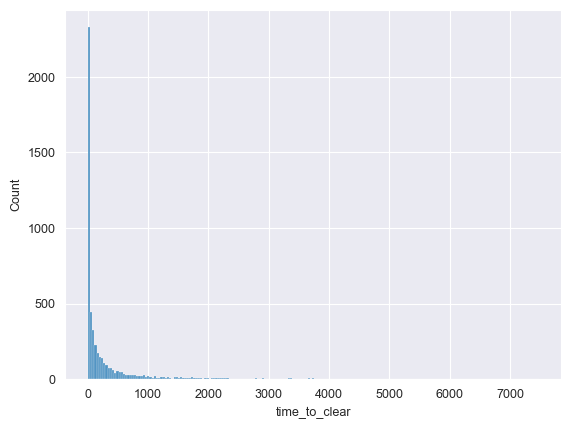

In [28]:
sns.histplot(data=all_cleared_df, x='time_to_clear', stat='count', bins='auto', cumulative=False)

In [29]:
cleared_fem = all_cleared_df[all_cleared_df['sex'] == 'F']
cleared_fem

,case_number,unique_id,date_x,block_x,primary_type,iucr,age,sex,race,month,...,year,id,date,injury_type,cleared,date_clear,beat,district,time_to_clear,year_cleared
13,G069278,HOM-G069278-#1,2001-02-03 00:53:00,1500 W WARREN BV,HOMICIDE,110,30-39,F,BLK,2,...,2001,678.0,2001-02-03 00:00:00,STRANGULATION,Y,2001-05-03,1333.0,13.0,89.0,2001.0
14,G072969,HOM-G072969-#1,2001-02-05 00:30:00,10200 S STATE ST,HOMICIDE,110,70-79,F,BLK,2,...,2001,686.0,2001-02-05 00:00:00,OTHER,Y,2001-02-15,511.0,5.0,10.0,2001.0
33,G168213,HOM-G168213-#1,2001-03-24 15:02:00,7600 S CICERO AVE,HOMICIDE,110,40-49,F,BLK,3,...,2001,731.0,2001-03-24 00:00:00,SHOT,Y,2001-03-27,833.0,8.0,3.0,2001.0
42,G491442,HOM-G491442-#1,2001-08-18 02:16:00,2200 S STATE ST,HOMICIDE,110,20-29,F,BLK,8,...,2001,1015.0,2001-08-18 00:00:00,SHOT,Y,2001-08-20,134.0,1.0,2.0,2001.0
44,G493069,HOM-G493069-#1,2001-08-18 21:15:00,300 E KENSINGTON AVE,HOMICIDE,110,30-39,F,BLK,8,...,2001,1017.0,2001-08-18 00:00:00,STRANGULATION,Y,2001-08-27,532.0,5.0,9.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11405,HZ493319,HOM-HZ493319-#1,2016-10-28 22:20:00,1900 W GARFIELD BLVD,HOMICIDE,110,30-39,F,BLK,10,...,2016,22882.0,2016-10-28 00:00:00,SHOT,Y,2017-01-04,932.0,9.0,68.0,2017.0
11466,JD397606,HOM-JD397606-#2,2020-10-13 00:05:00,2100 E 95TH PL,HOMICIDE,110,30-39,F,BLK,10,...,2020,25558.0,2020-10-13 00:05:00,OTHER,Y,2020-10-22,431.0,4.0,8.0,2020.0
11473,JD164620,HOM-JD164620-#5,2020-02-25 17:18:00,7900 S AVALON AVE,HOMICIDE,110,0-19,F,BLK,2,...,2020,24969.0,2020-02-25 17:18:00,SHOT,Y,2020-12-16,411.0,4.0,294.0,2020.0
11483,HX293341,HOM-HX293341-#2,2014-06-07 03:10:00,4600 S ELLIS AVE,HOMICIDE,110,20-29,F,BLK,6,...,2014,24273.0,2014-06-07 03:10:00,SHOT,Y,2021-06-17,222.0,2.0,2566.0,2021.0


### Plot 2

In [30]:
# all homicides and clearances
total_hom_yr = pd.DataFrame(final_merge_df.groupby(['year'])['case_number'].count()).reset_index()
clr_yr = pd.DataFrame(all_cleared_df.groupby(['year'])['case_number'].count()).reset_index()
total_commit_cleared = pd.merge(clr_yr, total_hom_yr, on=['year']).rename(
    columns={'case_number_y': 'hom_total', 'case_number_x': 'clear_total'})

In [31]:
# firearm homicides and firearm clearances
firearm = pd.DataFrame(final_merge_df.groupby(['year'])['gunshot_injury_i'].
                       apply(lambda x: (x == 'YES').sum())).reset_index()
firearm_clr = pd.DataFrame(all_cleared_df.groupby(['year'])['gunshot_injury_i'].
                           apply(lambda x: (x == 'YES').sum())).reset_index()
total_firearm = pd.merge(firearm, firearm_clr, on=['year']).rename(
    columns={'gunshot_injury_i_x': 'firearm_total', 'gunshot_injury_i_y': 'firearm_clear'})

In [32]:
dv = pd.DataFrame(final_merge_df.groupby(['year'])['domestic'].
                  apply(lambda x: (x == True).sum())).reset_index()
dv_clr = pd.DataFrame(all_cleared_df.groupby(['year'])['domestic'].
                      apply(lambda x: (x == True).sum())).reset_index()
total_dv = pd.merge(dv, dv_clr, on=['year']).rename(
    columns={'domestic_x': 'dv_total', 'domestic_y': 'dv_clear'})

In [33]:
total_commit_cleared = pd.melt(total_commit_cleared, id_vars=['year'],
                               value_vars=['hom_total', 'clear_total'],
                               var_name='case_status', value_name='Count')

In [34]:
total_firearm = pd.melt(total_firearm, id_vars=['year'],
                        value_vars=['firearm_total', 'firearm_clear'],
                        var_name='case_status', value_name='Count')

In [35]:
total_dv = pd.melt(total_dv, id_vars=['year'], value_vars=['dv_total', 'dv_clear'],
                   var_name='case_status', value_name='Count')

In [36]:
def line_subplots(df, ax_n):
    plt.rcParams.update({'font.size': 9})
    sns.set_style("darkgrid")
    sns.lineplot(data=df, x='year', y='Count',
                 hue='case_status', ax=ax_n, linewidth=0.75, palette=['#34495e', '#3498db'])
    ax_n.legend(loc='best')
    ax_n.set_xlabel('Year')
    ax_n.set_ylabel('Count')
    ax_n.set_xticks(range(2001, 2022))
    return

In [37]:
def plot_annotate(ax_n, y1, y2, y3):
    style = dict(size=10, color='red', alpha=0.75)
    ax_n.axvline(2001, linestyle='dashed', color='red', alpha=0.25)
    ax_n.axvline(2008, linestyle='dashed', color='red', alpha=0.25)
    ax_n.axvline(2020, linestyle='dashed', color='red', alpha=0.25)
    ax_n.text(2001, y1, '  9/11 Attack', ha='left',  **style)
    ax_n.text(2008, y2, 'Financial Crisis Starts  ', ha='right',  **style)
    ax_n.text(2020, y3, 'Covid-19 Lockdown  ', ha='right',  **style)
    return

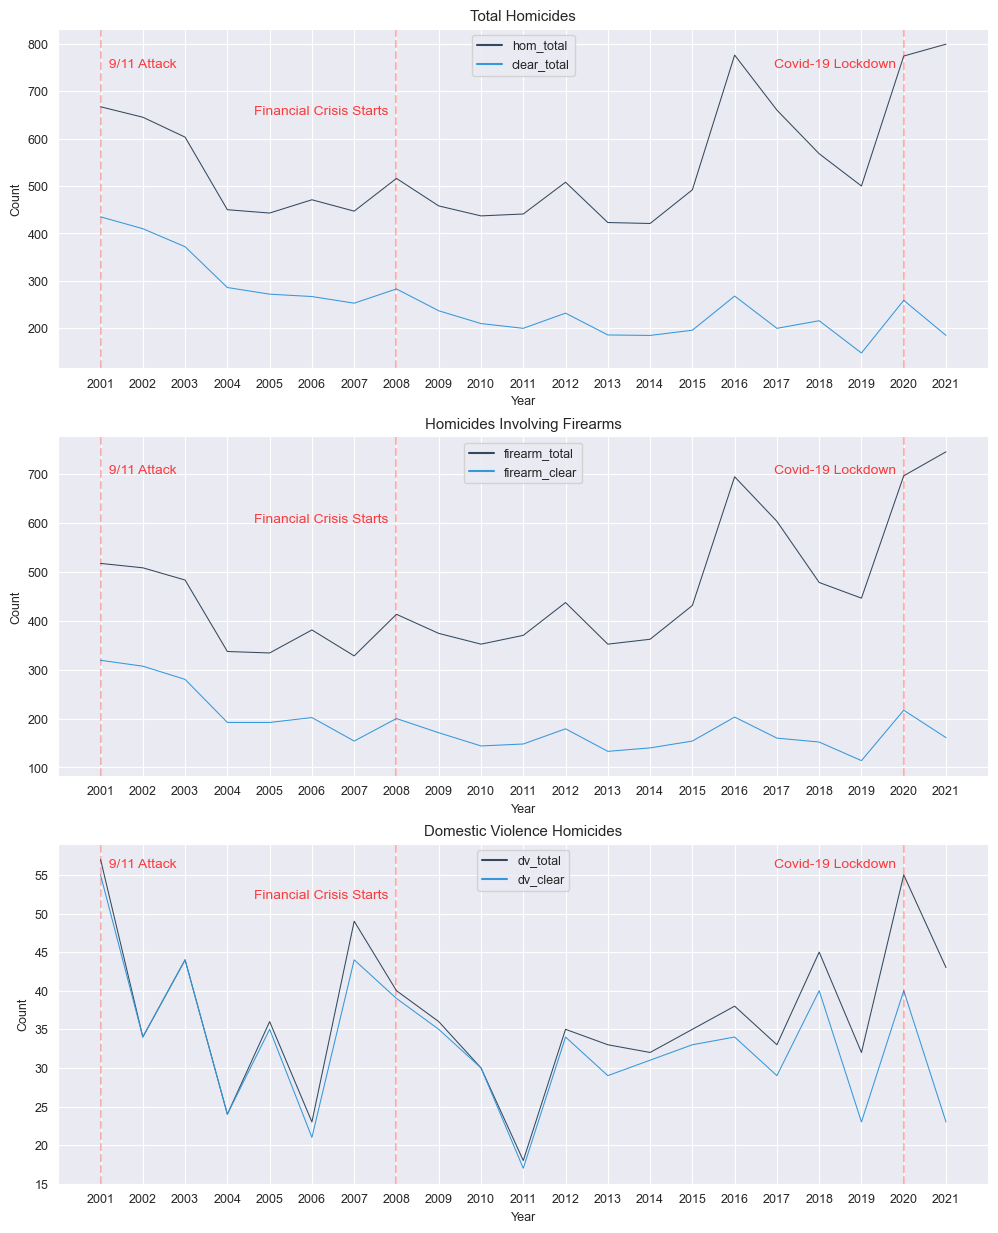

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
ax1, ax2, ax3 = axes.flatten()
line_subplots(total_commit_cleared, ax1)
line_subplots(total_firearm, ax2)
line_subplots(total_dv, ax3)
plot_annotate(ax1, 750, 650, 750)
plot_annotate(ax2, 700, 600, 700)
plot_annotate(ax3, 56, 52, 56)
ax1.set_title('Total Homicides')
ax2.set_title('Homicides Involving Firearms')
ax3.set_title('Domestic Violence Homicides')
plt.savefig(os.path.join(path, 'plots/static_plot_2.png'))

Sources:
For heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html;
https://regenerativetoday.com/time-series-data-visualization-in-python/,
For annotations:
https://jessica-miles.medium.com/adding-annotations-to-visualizations-using-matplotlib-279e9c770baa
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html